 make api call, get response in xml and json, put it in sqlite db, retrive the records as per user request.

 End-to-End Flow: API → pandas → SQLite → SQL → pandas → visualization

In [16]:
# Fetch and normalize data API -> Pandas
import requests
import pandas as pd

#Fetch data
url = "https://restcountries.com/v3.1/all?fields=name,population"
response = requests.get(url)
data = response.json()
print(len(data))
print(data[0])



250
{'name': {'common': 'Azerbaijan', 'official': 'Republic of Azerbaijan', 'nativeName': {'aze': {'official': 'Azərbaycan Respublikası', 'common': 'Azərbaycan'}}}, 'population': 10110116}


In [17]:
print(f'country name: {data[0]['name']['common']} - population: {data[0]['population']}')


country name: Azerbaijan - population: 10110116


In [47]:
df = pd.json_normalize(data)
df.head()

,population,name.common,name.official,name.nativeName.aze.official,name.nativeName.aze.common,name.nativeName.eng.official,name.nativeName.eng.common,name.nativeName.fra.official,name.nativeName.fra.common,name.nativeName.bjz.official,...,name.nativeName.arc.official,name.nativeName.arc.common,name.nativeName.ckb.official,name.nativeName.ckb.common,name.nativeName.nno.official,name.nativeName.nno.common,name.nativeName.nob.official,name.nativeName.nob.common,name.nativeName.smi.official,name.nativeName.smi.common
0,10110116,Azerbaijan,Republic of Azerbaijan,Azərbaycan Respublikası,Azərbaycan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38005238,Canada,Canada,NaN,NaN,Canada,Canada,Canada,Canada,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,397621,Belize,Belize,NaN,NaN,Belize,Belize,NaN,NaN,Belize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83240525,Germany,Federal Republic of Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51780579,South Korea,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df = df[['population','name.common']]
df = df.rename(columns={"name.common":"country"})

In [ ]:
# Pandas to SQL
import sqlite3
import pprint

conn = sqlite3.connect("rootIndia.db",isolation_level=None)
df.to_sql("countries",conn,if_exists='replace',index=False)


In [52]:
pprint.pprint(conn.execute('SELECT name FROM sqlite_schema WHERE type="table"').fetchall())
pprint.pprint(conn.execute('PRAGMA TABLE_INFO("countries")').fetchall())

[('countries',)]
[(0, 'population', 'INTEGER', 0, None, 0), (1, 'country', 'TEXT', 0, None, 0)]


In [85]:
# SQL to Pandas
quary = 'SELECT population, country FROM countries'
df_sql = pd.read_sql_query(quary,conn)
df_sql.head()

,population,country
0,10110116,Azerbaijan
1,38005238,Canada
2,397621,Belize
3,83240525,Germany
4,51780579,South Korea


In [101]:
# Pandas Math
total_population = df_sql['population'].sum()
print(f"Total Population: {total_population}")

Total Population: 7777721563


In [104]:
india_population = df_sql[df_sql['country']=='India']['population'].values[0]
print('India Population',india_population)


India Population 1380004385


In [95]:
#math probability
probability_india = india_population / total_population
average_population = df_sql['population'].mean()
india_vs_avarage = india_population / average_population
print('Probaility of India: ', probability_india)
print('India vs avarage population: ',india_vs_avarage)

Probaility of India:  7.5190634487015355
India vs avarage population:  44.357604403226695


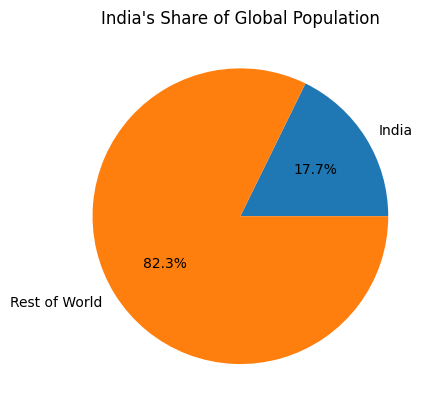

🌍 Total World Population: 7777721563
🇮🇳 India's Population: 1380004385
🧮 Probability of being born in India: 7.5191
📊 Average Country Population: 31110886
📏 India vs Average: 44.36 times larger


In [106]:
# visualisation
import matplotlib.pyplot as plt

rest_of_world = total_population - india_population

labels = ['India', 'Rest of World']
sizes = [india_population, rest_of_world]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("India's Share of Global Population")
plt.show()

print("🌍 Total World Population:", total_population)
print("🇮🇳 India's Population:", india_population)
print("🧮 Probability of being born in India:", round(probability_india, 4))
print("📊 Average Country Population:", round(average_population))
print("📏 India vs Average:", round(india_vs_avarage, 2), "times larger")